In [34]:
# source: https://www.kaggle.com/competitions/titanic/overview

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()
# train_data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
# train_data.shape
# train_data.describe()
# train_data.describe(include=['O'])
# train_data.info()
# train_data.isnull().sum()

# test_data.shape
# test_data.head()
# test_data.info()
# test_data.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
# https://www.kaggle.com/code/chapagain/titanic-solution-a-beginner-s-guide/notebook
# higher class passegers have better survival
train_data.Pclass.value_counts()
train_data.groupby('Pclass').Survived.value_counts()
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=train_data)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [58]:
# females have better survival rate
train_data.Sex.value_counts()
train_data.groupby('Sex').Survived.value_counts()
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
sns.barplot(x="Sex", y="Survived", data=train_data)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [60]:
# train_data.groupby("Pclass").Sex.value_counts(normalize=True) gives value_count / total for group (aka percentage)
# train_data.groupby("Pclass").Sex.value_counts(normalize=True)
# tab = pd.crosstab(train_data['Pclass'], train_data['Sex'], normalize="index") percentage option
tab = pd.crosstab(train_data['Pclass'], train_data['Sex'])
print (tab)

# graph
# tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# plt.xlabel('Pclass')
# plt.ylabel('Percentage')
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

# females in 1st & 2nd class had high survival rates (almost 100%)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


C:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


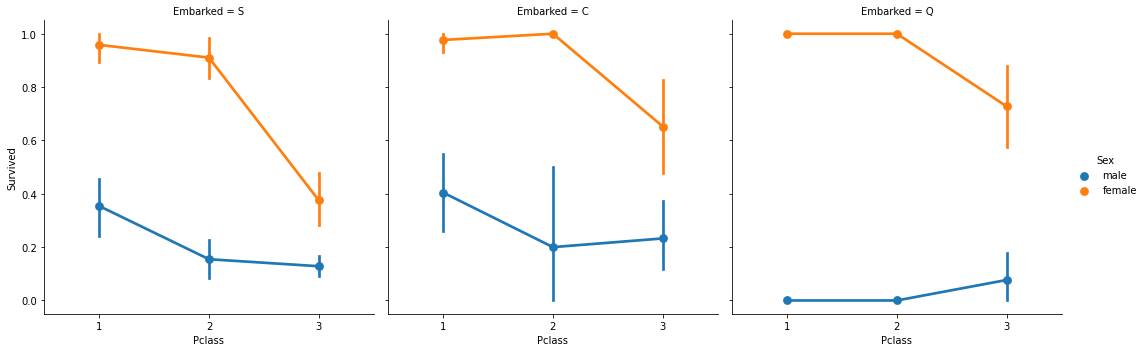

In [75]:
# embarked vs survived
# embarked = col, hue = pclass, sex = x, survived = y
train_data.groupby(["Embarked" , "Pclass","Sex"]).Survived.value_counts()
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col="Embarked", data=train_data)

In [86]:
# parch x survived
train_data.groupby("Parch").Survived.value_counts(normalize=True)
# train_data.groupby("Parch").Survived.mean()
# sns.barplot(x='Parch', y='Survived', ci=None, data=train_data) # ci=None will hide the error bar

Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

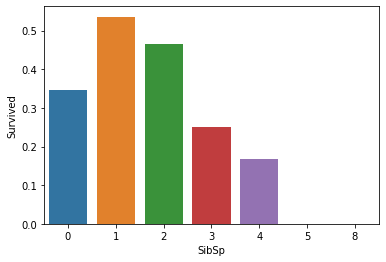

In [103]:
# SibSp x survived
train_data.groupby(["SibSp"], as_index=False).Survived.mean()
train_data.groupby("SibSp").Survived.value_counts()
# vals side by side
# tab = pd.crosstab(train_data["SibSp"], train_data["Survived"])
# print(tab)
sns.barplot(x="SibSp",y="Survived",data=train_data,ci=None)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

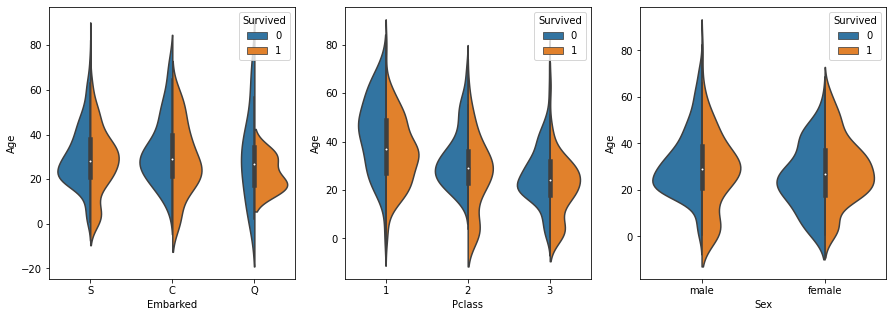

In [105]:
#  age x survival
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_data, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_data, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, split=True, ax=ax3)

<AxesSubplot:xlabel='Male Age'>

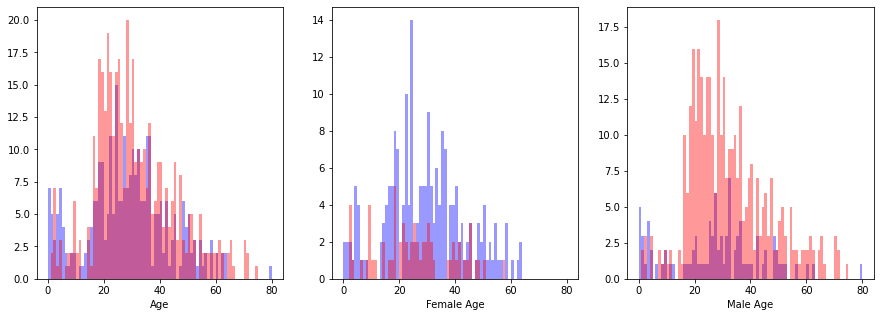

In [117]:
# age x survived, with color = survived (blue = survived, red = died, purple = overlap)
total_survived = train_data[train_data['Survived']==1]
total_not_survived = train_data[train_data['Survived']==0]
male_survived = train_data[(train_data['Survived']==1) & (train_data['Sex']=="male")]
female_survived = train_data[(train_data['Survived']==1) & (train_data['Sex']=="female")]
male_not_survived = train_data[(train_data['Survived']==0) & (train_data['Sex']=="male")]
female_not_survived = train_data[(train_data['Survived']==0) & (train_data['Sex']=="female")]

# https://www.w3schools.com/python/matplotlib_subplot.asp

plt.figure(figsize=[15,5])
plt.subplot(131)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.subplot(132)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(133)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')


<AxesSubplot:>

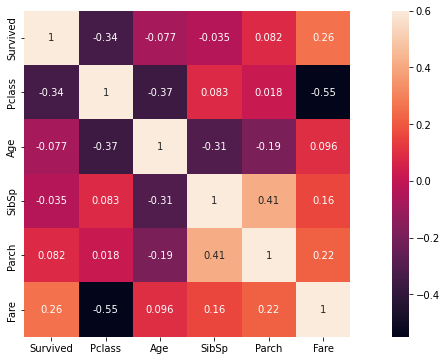

In [119]:
# correlation heatmap
plt.figure(figsize=(15,6))
sns.heatmap(train_data.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [120]:
# left off "Feature Extraction" half-way down
# https://www.kaggle.com/code/chapagain/titanic-solution-a-beginner-s-guide/notebook

In [18]:
from sklearn.ensemble import RandomForestClassifier


features = ["Pclass", "Sex", "SibSp","Embarked","Parch"]
importantVars = features.copy()
importantVars.append("Survived")

df = train_data[importantVars].dropna(axis=0)
pd.cut(df.Pclass, bins=[0,0.5,1.5,2.5],labels=["1st","2nd","3rd"])
X = pd.get_dummies(df[features])
y = df["Survived"]
X_test = pd.get_dummies(test_data[features])



model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv("submission.csv", index=False)